In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files


Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/My Drive/titanic.csv', index_col='PassengerId')



In [ ]:
 data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
data.drop(columns='Cabin').isna().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.200917
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000764
Embarked    0.001528
dtype: float64

In [ ]:
data.dropna(subset=['Embarked'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [ ]:
data['Age'] = data['Age'].round()
data['Pclass'] = data['Pclass'].map({1: 'Upper', 2: 'Middle', 3: 'Lower'})
data['Embarked'] = data['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S':'Southampton'})
data['Survived'] = data['Survived'].map({0: 'Survived', 1: 'Not Survived'})
data['Sex'] = data['Sex'].str.title()
categorical_columns = ['Sex', 'Parch', 'SibSp', 'Pclass', 'Embarked','Survived']
data[categorical_columns] = data[categorical_columns].astype('category')


In [ ]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,Survived,Lower,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,Not Survived,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,Not Survived,Lower,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,Not Survived,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,Southampton
5,Survived,Lower,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
1305,Survived,Lower,"Spector, Mr. Woolf",Male,NaN,0,0,A.5. 3236,8.0500,NaN,Southampton
1306,Not Survived,Upper,"Oliva y Ocana, Dona. Fermina",Female,39.0,0,0,PC 17758,108.9000,C105,Cherbourg
1307,Survived,Lower,"Saether, Mr. Simon Sivertsen",Male,38.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Southampton


In [ ]:
data.dropna(subset=['Age'], inplace=True)

In [ ]:
 cols = [
'Name', 'Sex', 'Age', 'Parch', 'SibSp',
'Ticket', 'Pclass', 'Embarked', 'Fare',
'Survived',
]
data = data[cols]

In [ ]:
data.to_csv('/content/drive/My Drive/titanic_new.csv')

In [ ]:
data.head()

,Name,Sex,Age,Parch,SibSp,Ticket,Pclass,Embarked,Fare,Survived
PassengerId,,,,,,,,,,
1,"Braund, Mr. Owen Harris",Male,22.0,0,1,A/5 21171,Lower,Southampton,7.2500,Survived
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,0,1,PC 17599,Upper,Cherbourg,71.2833,Not Survived
3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,Lower,Southampton,7.9250,Not Survived
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,0,1,113803,Upper,Southampton,53.1000,Not Survived
5,"Allen, Mr. William Henry",Male,35.0,0,0,373450,Lower,Southampton,8.0500,Survived


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1046 entries, 1 to 1307
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      1046 non-null   object  
 1   Sex       1046 non-null   category
 2   Age       1046 non-null   float64 
 3   Parch     1046 non-null   category
 4   SibSp     1046 non-null   category
 5   Ticket    1046 non-null   object  
 6   Pclass    1046 non-null   category
 7   Embarked  1044 non-null   category
 8   Fare      1045 non-null   float64 
 9   Survived  1046 non-null   category
dtypes: category(6), float64(2), object(2)
memory usage: 48.2+ KB


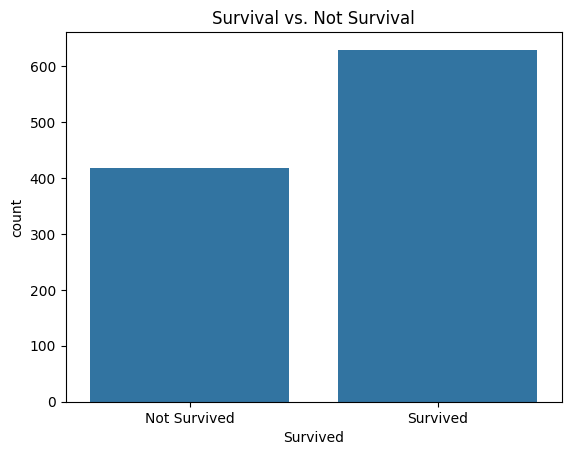

In [ ]:
sns.countplot(data=data, x='Survived')
plt.title('Survival vs. Not Survival')
plt.show();

<Axes: xlabel='Age', ylabel='Count'>

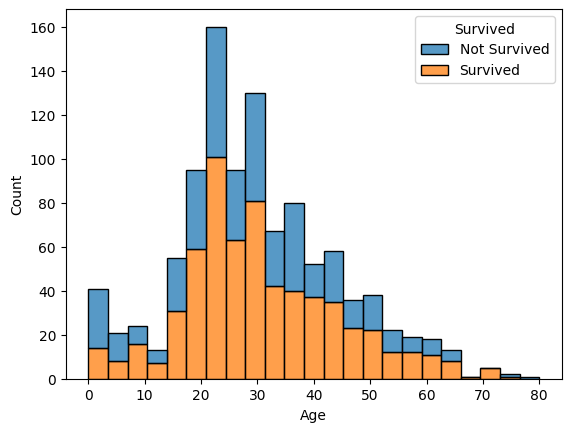

In [ ]:
sns.histplot(data=data, x="Age", hue="Survived", multiple="stack")

<Axes: xlabel='Pclass', ylabel='count'>

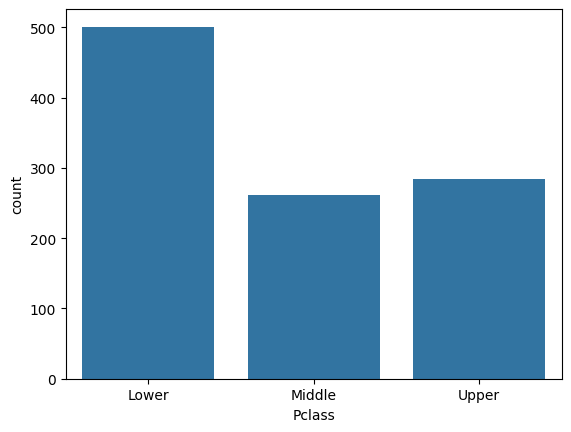

In [ ]:
data['Survived'].value_counts()  # Counts of 'Survived' and 'Not Survived'
sns.countplot(x='Pclass', data=data)  # Bar plot of passenger class distribution

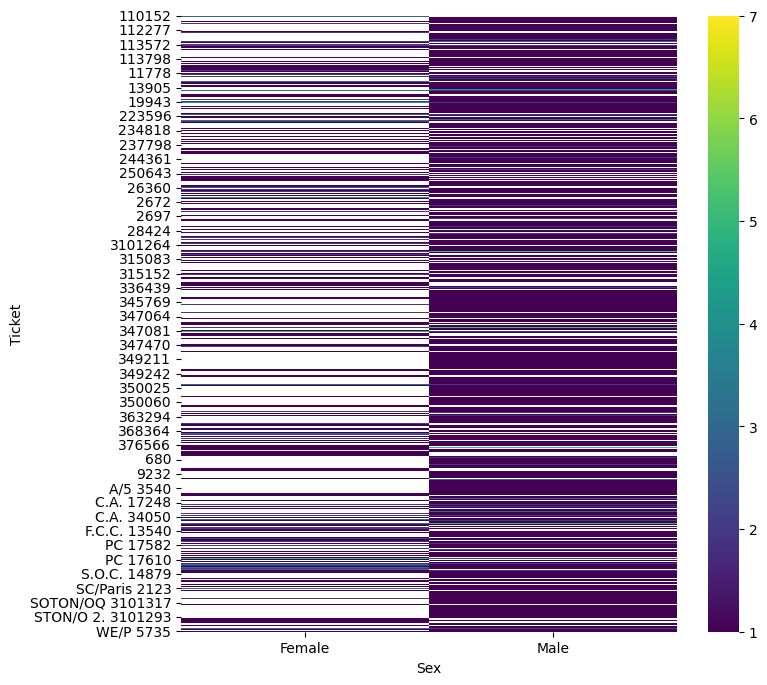

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Ticket'].value_counts()
    for x_label, grp in data.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('Ticket')

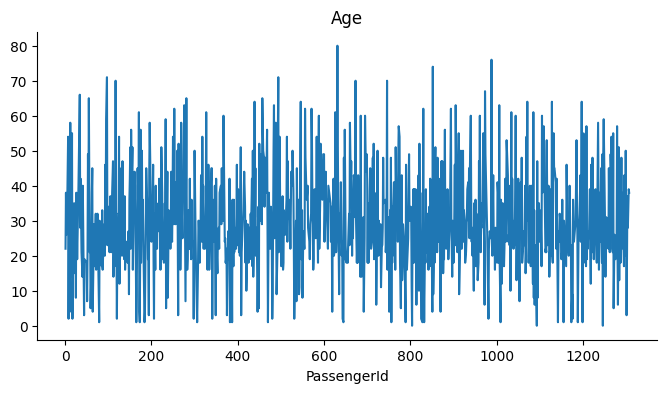

In [ ]:
data['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

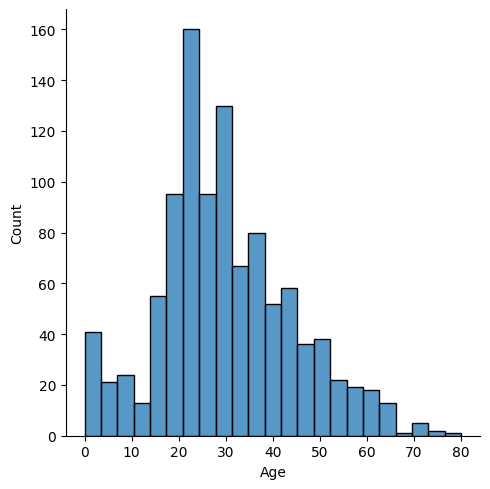

In [ ]:
sns.displot(data['Age'])  # Histogram of age

<Axes: xlabel='Fare'>

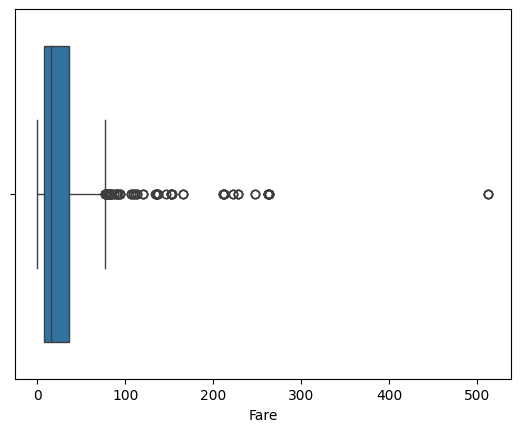

In [ ]:
sns.boxplot(x='Fare', data=data)  # Box plot of fares

<Axes: xlabel='Pclass', ylabel='Age'>

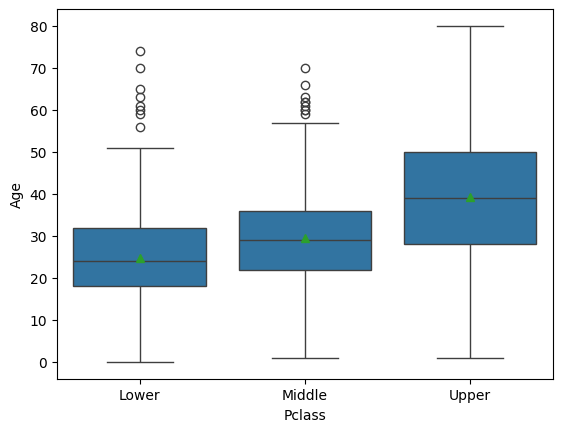

In [ ]:
sns.boxplot(x='Pclass', y='Age', showmeans=True, data=data)